# Image Preprocessing for Pneumonia Classification

[Open in Colab](https://colab.research.google.com/github/omarsagoo/AI-pneumonia-classifier/blob/main/notebooks/preprocessing.ipynb)

This notebook handles image loading, preprocessing, and augmentation for the chest X-ray dataset used in the pneumonia classification project.

## Objectives

- Load and inspect raw X-ray images
- Normalize image dimensions and pixel intensities
- Apply grayscale conversion
- Perform data augmentation to reduce overfitting
- Prepare data generators for model training and evaluation

## Install Dependecies and Import Required Packages

In [1]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-06-10 06:46:44.624653: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Import utility functions

from utils.preprocessor import show_sample_images, visualize_augmentation

## Directory Structure

Define paths to the training, validation, and test datasets.

In [3]:
base_dir = '../chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

## Visual Inspection of Images

Display a few sample images from each class to understand dataset characteristics.


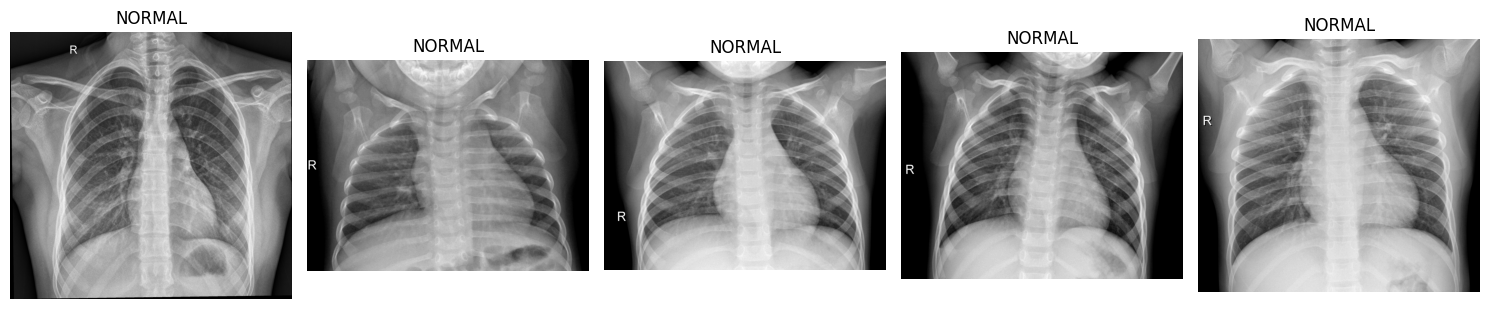

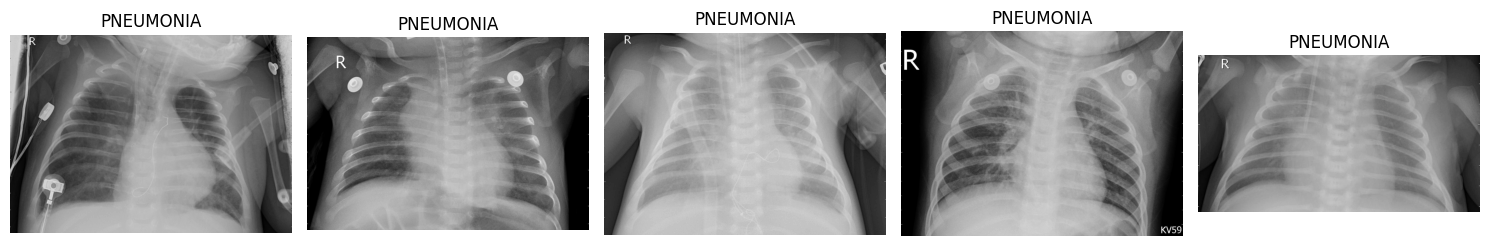

In [4]:
# Visualize normal and pneumonia samples
show_sample_images(train_dir, 'NORMAL')
show_sample_images(train_dir, 'PNEUMONIA')

## Data Preprocessing and Augmentation

To mitigate overfitting and simulate real-world variability in medical imaging, we apply a variety of computer vision augmentation techniques during training, including:

- Horizontal flipping
- Random cropping (via width and height shift)
- Rotation
- Zoom
- Brightness adjustment
- Shearing

All pixel values are rescaled to the [0, 1] range.

Medical imaging datasets are often limited in size and diversity due to patient privacy, cost, and availability. Data augmentation is a critical technique to increase the effective size of the dataset and improve model generalization.

For pneumonia detection from chest X-rays, augmentation serves several purposes:

- **Horizontal flipping** simulates anatomical variation and positional differences between left and right lungs.
- **Cropping and shifting** emulate differences in patient positioning and framing.
- **Brightness adjustments** reflect variability in exposure across X-ray machines.
- **Rotation and shear** simulate variations due to imperfect alignment of patients during scanning.
- **Zoom and scaling** improve the model’s ability to recognize pneumonia patterns at different resolutions.

These augmentations help the model learn invariant and robust features, reducing overfitting and improving performance on unseen data.

In [5]:
IMG_SIZE = (150, 150)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,             # Random rotation between -15 to 15 degrees
    width_shift_range=0.1,         # Horizontal shift
    height_shift_range=0.1,        # Vertical shift
    zoom_range=0.1,                # Random zoom
    shear_range=0.1,               # Shear angle
    horizontal_flip=True,          # Random horizontal flipping
    brightness_range=[0.8, 1.2]    # Random brightness adjustment
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


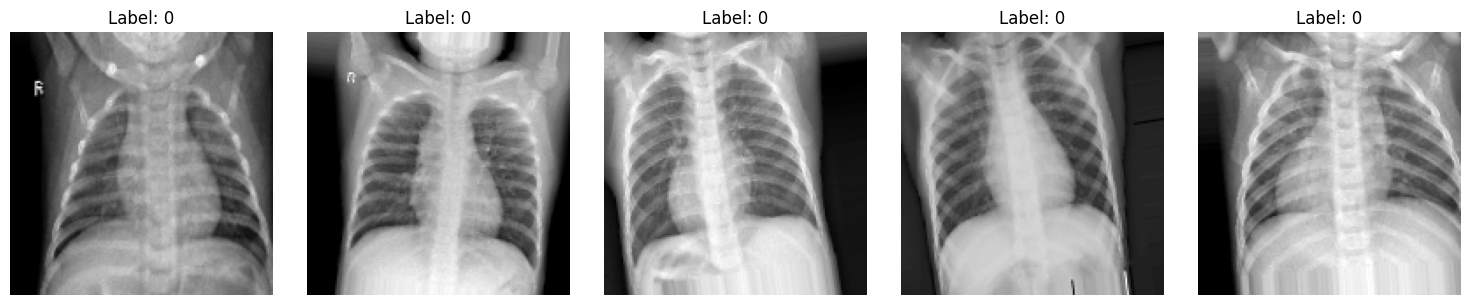

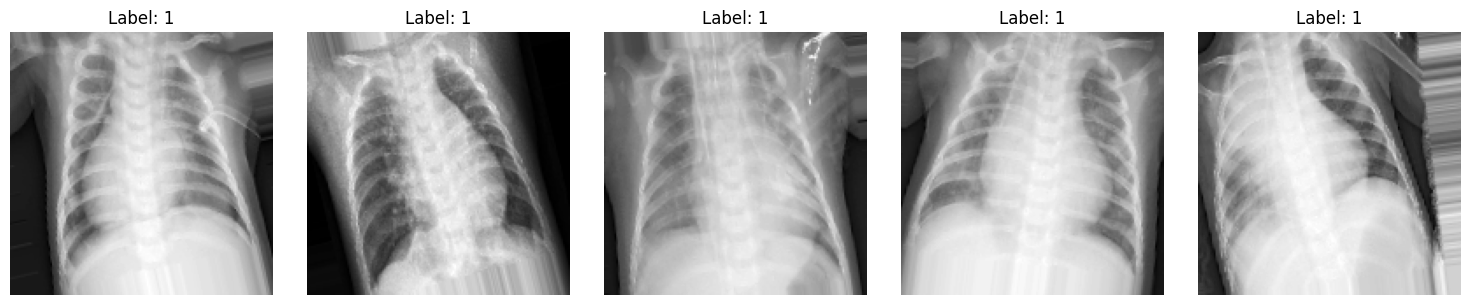

In [6]:
# Show examples of augmented 'NORMAL' (label 0) and 'PNEUMONIA' (label 1)
visualize_augmentation(train_generator, class_label=0, num_images=5)
visualize_augmentation(train_generator, class_label=1, num_images=5)

## Next Steps

- Verify class balance in the generators
- Export and visualize augmented batches
- Proceed to model training and evaluation in a separate notebook